## Establishing Environment

#### Please make sure to run all the codes from top to down

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import math

# Director for GSVA files
all_files = glob.glob('./Part1B/*.csv')


### Data Preparation and Cleaning 
#### 1. Get statewise % growth rate and GSDP for Part I-A
#### 2. Get Statewise and Sector wise GDDP for Part I-B
#### 3. Get and clean data for drop outs for Part II
#### _4. Combine all above in one single DataFrame_

**_please run the following_**

In [3]:
# get and prepare statewise data

# State Names
state_names =['Items','Duration','Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
 'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar_Pradesh','All India']

# rename columns
renmae_columns={'Items  Description':'Items','Andhra Pradesh ':'Andhra_Pradesh', 'Arunachal Pradesh':'Arunachal_Pradesh', 'Assam':'Assam', 'Bihar':'Bihar',
 'Chhattisgarh':'Chhattisgarh', 'Goa':'Goa', 'Gujarat':'Gujarat','Haryana':'Haryana','Himachal Pradesh':'Himachal_Pradesh',
 'Jammu & Kashmir':'Jammu_Kashmir', 'Jharkhand':'Jharkhand', 'Kerala':'Kerala', 'Madhya Pradesh':'Madhya_Pradesh',
 'Maharashtra':'Maharashtra', 'Manipur':'Manipur', 'Meghalaya':'Meghalaya', 'Mizoram': 'Mizoram', 'Nagaland': 'Nagaland',
 'Odisha': 'Odisha', 'Punjab': 'Punjab', 'Rajasthan': 'Rajasthan', 'Sikkim': 'Sikkim', 'Tamil Nadu':'Tamil_Nadu',
 'Telangana':'Telangana', 'Tripura': 'Tripura', 'Uttarakhand': 'Uttarakhand', 'Uttar Pradesh': 'Uttar_Pradesh','All_India GDP':'All India'}

######################################################################################################
def get_data_part_one_A():
    # def prepareStatewise_df():
    statewise_gdp=pd.read_csv('./Part1A/ab40c054-5031-4376-b52e-9813e776f65e.csv')

    #Rename columns
    statewise_gdp=statewise_gdp.rename(columns=renmae_columns)

    # DROP 2016-17 SINCE IT HAS MUCH BLANK
    statewise_gdp= statewise_gdp[statewise_gdp['Duration']!='2016-17']

    # Exclude unneeded rows
    statewise_gdp_growth=statewise_gdp[statewise_gdp['Items'].isin(['''(% Growth over previous year)''']) & (statewise_gdp['Duration'].isin(['2011-12','2012-13','2013-14','2014-15','2015-16']))]
    statewise_gdp_gsdp=statewise_gdp[(statewise_gdp['Items'].isin(['''GSDP - CURRENT PRICES (` in Crore)'''])) & (statewise_gdp['Duration'].isin(['2015-16']))]

    #Concatenate two data frames
    statewise_gdp=pd.concat([statewise_gdp_growth,statewise_gdp_gsdp])

    # INCLUDE ONLY STATES and other decisive columns like 'Items Description' and 'Duration'
    statewise_gdp=statewise_gdp[state_names]

    statewise_gdp.loc[statewise_gdp.Items=='''(% Growth over previous year)''','NewName']='Growth-'+statewise_gdp['Duration']
    statewise_gdp.loc[statewise_gdp.Items=='''GSDP - CURRENT PRICES (` in Crore)''','NewName']='GSDP-2015-16'

    #Drop duration column
    statewise_gdp=statewise_gdp.drop(columns=['Duration'])

    # transpost columns
    statewise_gdp=statewise_gdp.astype(object).T
    new_header=statewise_gdp.iloc[-1]

    # arrange column names remove index and replace item description
    statewise_gdp=statewise_gdp[1:-1]
    statewise_gdp.columns=new_header

    # change column 
    statewise_gdp[statewise_gdp.columns]=statewise_gdp[statewise_gdp.columns].apply(pd.to_numeric,errors='coerce')

    # Create average Growth Column to calculate average of Growth of all the years
    statewise_gdp['Growth_avg']=statewise_gdp[['Growth-2012-13','Growth-2013-14','Growth-2014-15','Growth-2015-16']].mean(axis=1).round(2)

    #Create another column from index name State
    statewise_gdp['State']=statewise_gdp.index

    return statewise_gdp

##############################################################################################################
# 2. Prepare data for GSDP sectorwise for 20
# Preparing master GSVA
def get_data_part_one_B():
    lst=[]
    
    keepColNames=['Item','2014-15']
    keepRowNames=['Agriculture, forestry and fishing','Mining and quarrying','Primary','Manufacturing','Electricity, gas, water supply & other utility services',
                  'Construction','Secondary','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting',
                  'Financial services','Real estate, ownership of dwelling & professional services','Public administration',
                  'Other services','Tertiary','Gross State Domestic Product','''Population ('00)''','Per Capita GSDP (Rs.)']
    for filename in all_files:
        df=pd.read_csv(filename,encoding='latin1', index_col=None,header=0)
        df=df[df['Item'].isin(keepRowNames)][keepColNames]
        df=df.T
        new_header=df.iloc[0]
        df=df[1:]
        df.columns=new_header
        df['State']=filename.split("\\")[-1].split('-')[1]
        lst.append(df)
    
    df=pd.concat(lst,axis=0,ignore_index=True)
    
    df[df.columns[:-1]]=df[df.columns[:-1]].apply(pd.to_numeric,errors='coerce')
    return df

# 3. Get and clean data for drop outs for Part II
def get_data_part_two():
    # get file 
    dropouts_df=pd.read_csv('./Part2/rs_session243_au570_1.1.csv')
    # dictionary to rename rows

    state_names =['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
     'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
     'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar_Pradesh']
    
    # keep these columns only according to the problem description
    keep_columsn=['State','Primary - 2014-2015', 'Upper Primary - 2014-2015','Secondary - 2014-2015']

    rename_the_columns={'State':'State','Primary - 2014-2015':'Drop_Primary', 'Upper Primary - 2014-2015':'Drop_Upper_Primary',
           'Secondary - 2014-2015':'Drop_Secondary'}

    renmae_rows={'Andhra Pradesh':'Andhra_Pradesh', 'Arunachal Pradesh':'Arunachal_Pradesh', 'Assam':'Assam', 'Bihar':'Bihar',
     'Chhatisgarh':'Chhattisgarh', 'Goa':'Goa', 'Gujarat':'Gujarat','Haryana':'Haryana','Himachal Pradesh':'Himachal_Pradesh',
     'Jammu and Kashmir':'Jammu_Kashmir', 'Jharkhand':'Jharkhand', 'Kerala':'Kerala', 'Madhya Pradesh':'Madhya_Pradesh',
     'Maharashtra':'Maharashtra', 'Manipur':'Manipur', 'Meghalaya':'Meghalaya', 'Mizoram': 'Mizoram', 'Nagaland': 'Nagaland',
     'Odisha': 'Odisha', 'Punjab': 'Punjab', 'Rajasthan': 'Rajasthan', 'Sikkim': 'Sikkim', 'Tamil Nadu':'Tamil_Nadu',
     'Telangana':'Telangana', 'Tripura': 'Tripura', 'Uttrakhand': 'Uttarakhand', 'Uttar Pradesh': 'Uttar_Pradesh'}

    dropouts_df['Level of Education - State'].replace(renmae_rows,inplace=True)
    dropouts_df=dropouts_df[dropouts_df['Level of Education - State'].isin(state_names)]
    dropouts_df.rename(columns={'Level of Education - State':'State'},inplace=True)
    dropouts_df=dropouts_df[keep_columsn]
    dropouts_df.rename(columns=rename_the_columns,inplace=True)
    
    # Calculate the mean of drop outs
    # Senior secondary has some missing values but we will keep the missing as it is 
    dropouts_df['DropAvg']=dropouts_df[['Drop_Primary', 'Drop_Upper_Primary','Drop_Secondary']].mean(axis=1).round(2)
    
    return dropouts_df

# 4. Combine all above in one single DataFrame
def combine_data_files():
    df1 =pd.merge(get_data_part_one_A(),get_data_part_one_B(),how='inner',on='State')
    df2=pd.merge(df1,get_data_part_two(),how='inner',on='State')
    return df2

# Data Cleaning and Manipulation Handling
**1. Data Part I-A**:

The data cleaning issue for **Data I-A: This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.** has been handled as following:
1. The data revmoved for **"2016-17"** since it had too many missing values and was not required
2. Excluded the **"non-state"** data from the data set
3. Renamed the state names to **"Normalize"** it based on names that is available with data file names in Part I-B
4. Excluded the unwanted data for GSDP **"GSDP - CURRENT PRICES (' in Crore)"** except GSDP data for **"2015-16"**
5. Created new column name **"NewName"** from combinanatio both item description and duration
6. Removed the **"Duration"** column as was not needed
7. Transposed the DataFrame and rename the column names with **"NewName"**
8. Changed the transpsosed columns type to numeric ```
statewise_gdp[statewise_gdp.columns]=statewise_gdp[statewise_gdp.columns].apply(pd.to_numeric,errors='coerce')```
9. Renamed column names to make them more reasable and easy referencing
10. Created average column **"Growth_avg"** to get average for % of growth for all years and rounded to 2 decimal ``` statewise_gdp['Growth_avg']=statewise_gdp[['Growth-2012-13','Growth-2013-14','Growth-2014-15','Growth-2015-16']].mean(axis=1).round(2)```
11. Created a new column named **"State"** from index for joining purposes with next dataset in **"Part I-B"
12. Some data points still have **"NaN"** and was intenationally keep like that. Changing them to 0 could affect the overal average of data at state level or overall. One way was to fill with average but we intentionally did not do it since the data points were few and did not give a good meaning.


**2. Data Part I-B**:

The data cleaning issue for **Data I-A: This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.** has been handled as following:
1. The data was extracted using automation to read all files containing inside **"GSVA"** folder
2. Each csv file were read with **latin1** encoding because some files were not readable in **utf-8** format
3. From each file only the **'Item', and '2014-15'** was extracted into a list and with filtering the following sector ``` 
    keepRowNames=['Agriculture, forestry and fishing','Mining and quarrying','Primary','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Secondary','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Tertiary','Gross State Domestic Product','Per Capita GSDP (Rs.)']```but the rest of columns and values excluded
4. Then changed the column data type from object to numeric for efficient and proper calculation and processing of the numeric data
5. Missing values was keept as **"NaN"** though there was not much missing data
6. Extracted states names from each file and saved under **"State"** column


**3. Data Part II**:

The data cleaning issue for **GDP and Education Dropout Rates** has been handled as following:
1. The was read using csv file with the same name as downloaded from the site ``` pd.read_csv('./other/rs_session243_au570_1.1.csv')``` 
2. Replace and standardized states names in **"Primary - 2014-2015"** keeping
3. Removed/excluded terretories from the data set
4. Renamed the column name **"Level of Education - State"** to **"State"**
5. Kept on these columns and excluded the rest ```
'State','Primary - 2014-2015', 'Upper Primary - 2014-2015','Secondary - 2014-2015', 'Senior Secondary - 2014-2015 ``` 
6. There were two columns for **"[Primary - 2014-2015]"** but picked the first one because it had fewer **missing** values
7. Renamed the filtered columns 
8. The missing values **NaN** was not revoved or imputed to any other number

**4. Combining all datasets**:
##### All the three processed dataset were combined in one data file using **State** column and merge feature of Pandas
Now we have the following four datasets as function:
  * Function named ```get_data_part_one_A()``` for retriveing **Part I-A** dataset
  * Function named ```get_data_part_one_B()``` for getting **Part I-B** dataset
  * Function named ```get_data_part_two()``` for getting  **Part II** dataset
  * Function named ```combine_data_files()``` for getting the combined dataset of all of the three datasets
  
**With the available combined dataset and individual datasets, we can proceed with the analysis. These data set will be used with the analysis but in some situations we may need to create a fresh with more option or use individual only depending the requirement**

## Plotting and Analysis

# Part I-A
### Question :Plot a graph for rows " % Growth over previous year" for all the states 

#### **1. Data Preparation**:
The data was extracted from  ```get_growth_rate()``` DataFrame with some extrac manipulation, filtering, and tabulation. 

#### **2. How**:
1. The data for **State-wise Gross Domestic Product (GDP) at current price on yearly basis** was extracted from the file located in ```'./other/ab40c054-5031-4376-b52e-9813e776f65e.csv'``` and then loaded in to data frame 
2. Then the data was filter for **% Growth over previous year** only and the Duration
3. All data for **% Growth over previous year** was kept to have as much data as possiblle
4. Then the **% Growth over previous year** was cancatenated with **Duration** to create a new column with for easy referincing 
5. After that **% Growth over previous year** average was calculated for each state and named **Growth_avg**
6. Then transposed the data 
7. Then made the plot for **best fit line**. Now for each state including national **All India** there is a plot. Each plot contains the following information:
    1. **% Growth over previous year** for each year plotted in scatter plot showing in blue dot
    2. **Best Fit line** shown in red line
    3. **National average** to display national average against each state shown in green line
    4. **State average** to display and compare state wise average shown in blue line
7. The plot is made using matplotlib subplot **gridspec** 
8. Loop was run to create all the plots
9. For missing values I have calculated the mean average.


#### **3. Analysis**:
These series of plots describe the growth rate of all states in India and also the average growth for each state and India as a whole for the duration of **2012-13 to 2016-17.** from **13.8** in 2012-13 to **11.52**

The overall growth rate in India as shown in the following grah, shows decline of growth rate at national level and also in most states

The growth rate for **Andra Pradesh** is increasing from the beggining to current while the growth rate for **Arunachal Pradesh** show decrease since 2012-13. While state-wise average of these two states are higher than national but **Arunachal Pradesh** average shows very high than national average. The growth rate at **Andra Pradesh** is far steady and constant but **Arunachal Pradesh** is not constant.

**Andhra Pradesh**, **Goa**, and **Jamu and Kashmir** are the top 3 fast growing states while  **Haryana**, **Odisha**, and **Gujrat** are the 3 slowest moving states. But when looking at the average 

But when ploting the average of each state and nation wide, we can see the following which is interesting. Please refer to full detail following this graph. 

With this **Mizoram, Nangaland, and Tipura** are the highest while **Sikim, Maghalaya, and Goa** are the slowest. 

I am not from India but I would select **Haryana** as my home state. **Haryana** average is around 13 while the national average is 11.9 which less than than my home state **Haryana**.

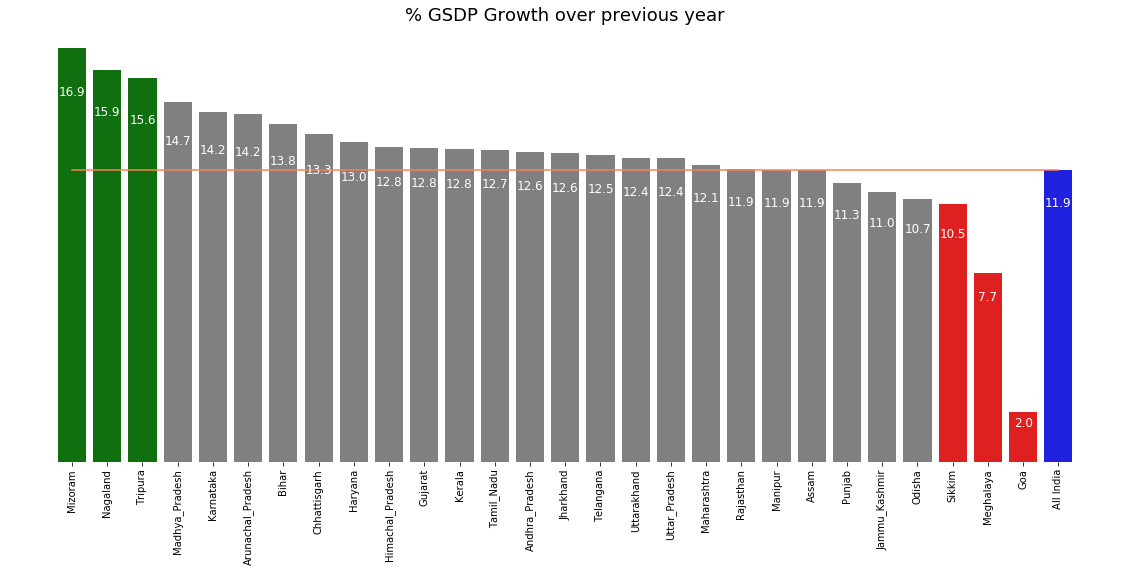

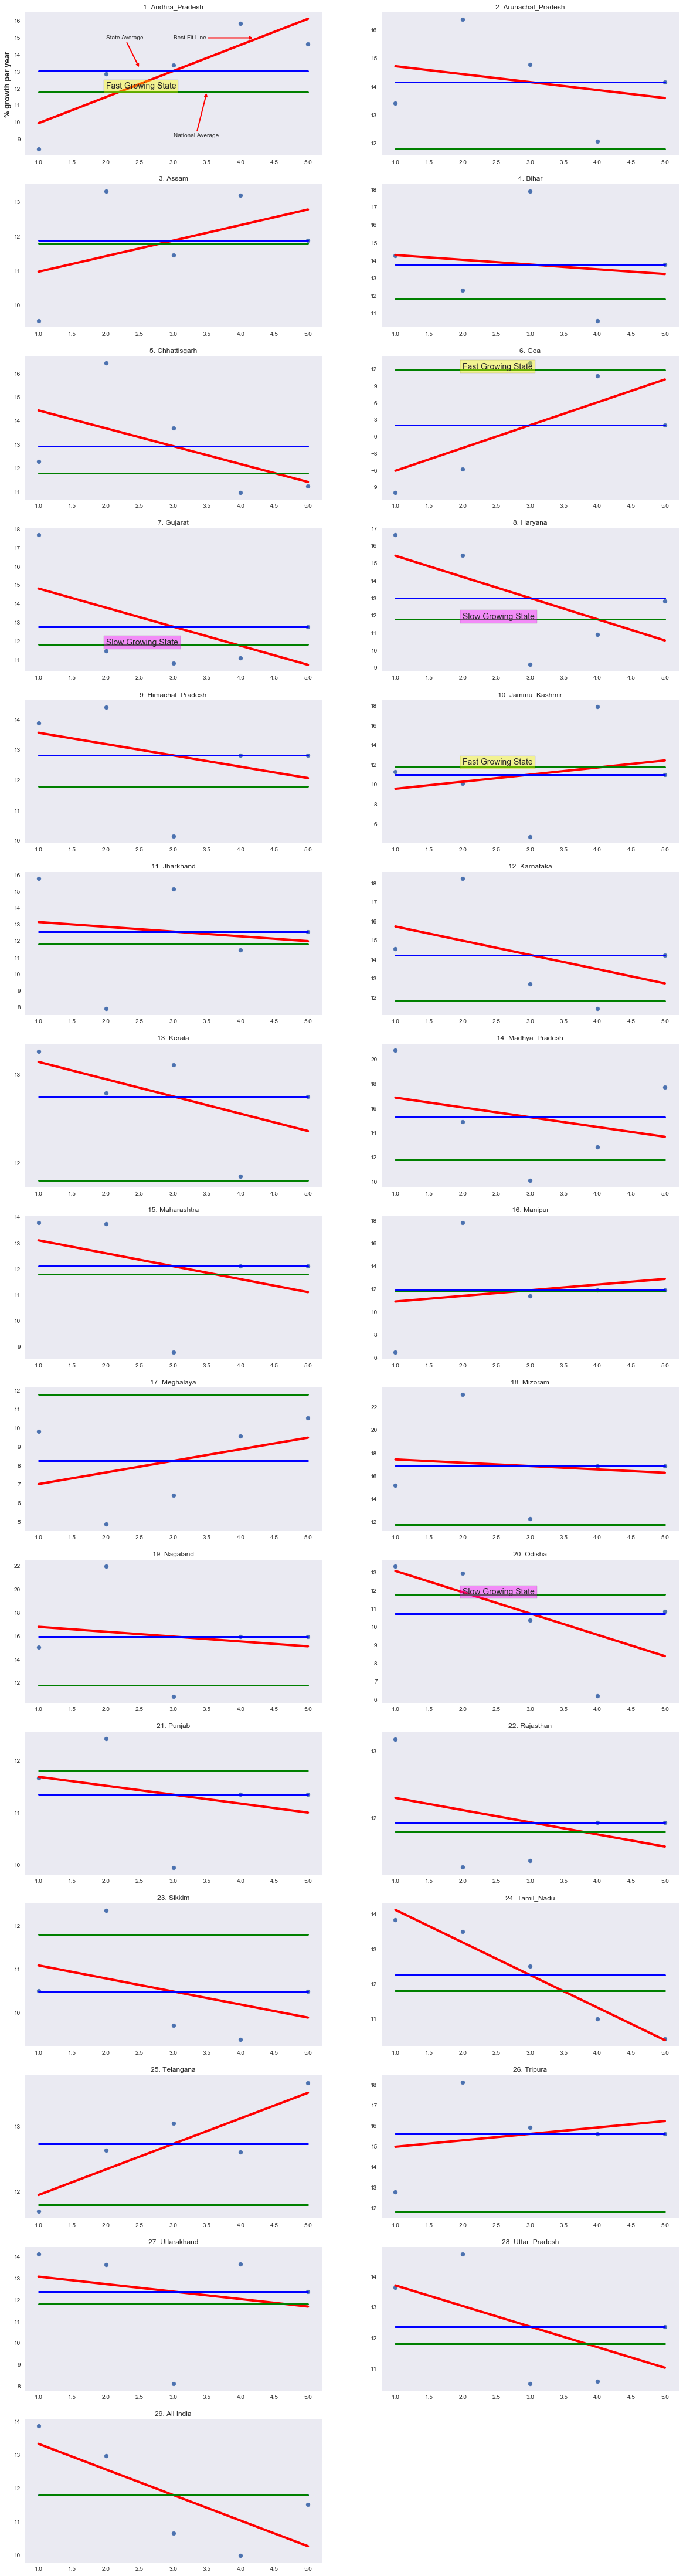

In [4]:
## prapare data frame
def get_growth_rate():
    # def get_growth_rate():
    statewise_gdp=pd.read_csv('./Part1A/ab40c054-5031-4376-b52e-9813e776f65e.csv')
    # State Names
    state_names =['Items','Duration','Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
     'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
     'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar_Pradesh','All India']

    #Rename columns
    statewise_gdp=statewise_gdp.rename(columns=renmae_columns)
    statewise_gdp=statewise_gdp
    # Exclude unneeded rows
    statewise_gdp_growth=statewise_gdp[statewise_gdp['Items'].isin(['''(% Growth over previous year)'''])]
                                       
    #Concatenate two data frames
    statewise_gdp=statewise_gdp_growth.copy()

    # INCLUDE ONLY STATES and other decisive columns like 'Items Description' and 'Duration'
    statewise_gdp=statewise_gdp[state_names]

    statewise_gdp.loc[statewise_gdp.Items=='''(% Growth over previous year)''','NewName']='Growth-'+statewise_gdp['Duration']

    #Drop duration column
    statewise_gdp=statewise_gdp.drop(columns=['Duration'])

    # transpost columns
    statewise_gdp=statewise_gdp.astype(object).T
    new_header=statewise_gdp.iloc[-1]

    # arrange column names remove index and replace item description
    statewise_gdp=statewise_gdp[1:-1]
    statewise_gdp.columns=new_header

    # change column 
    statewise_gdp[statewise_gdp.columns]=statewise_gdp[statewise_gdp.columns].apply(pd.to_numeric,errors='coerce')

    # Create average Growth Column to calculate average of Growth of all the years
    statewise_gdp['Growth_avg']=statewise_gdp[['Growth-2012-13','Growth-2013-14','Growth-2014-15','Growth-2015-16','Growth-2016-17']].mean(axis=1).round(2)

    #Create another column from index name State
    statewise_gdp['State']=statewise_gdp.index

    return statewise_gdp

# Filter and transpose data frame
def best_fit_line_plot():
    df_states=get_growth_rate().sort_values(by='Growth_avg',ascending=False)
    df_states=get_growth_rate()[get_growth_rate()['State']!='All India'][['State','Growth-2012-13', 'Growth-2013-14', 'Growth-2014-15', 'Growth-2015-16','Growth-2016-17','Growth_avg']]
    df_All_India=get_growth_rate()[get_growth_rate()['State']=='All India'][['State','Growth-2012-13', 'Growth-2013-14', 'Growth-2014-15', 'Growth-2015-16','Growth-2016-17','Growth_avg']]

    df1=pd.concat([df_states,df_All_India])
    df1=df1[['Growth-2012-13','Growth-2013-14','Growth-2014-15','Growth-2015-16','Growth-2016-17','Growth_avg']]

    #Transpose data
    df2=df1.T
    df2[df2.columns]=df2[df2.columns].apply(pd.to_numeric,errors='coerce')
    
    # Calculate the mean to impute NA
    df2=df2.fillna(df2.mean())

    # Creating figure
    #import gridspec to make grid for the plots
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator

    # set plot style
    plt.style.use('seaborn')
    # Set figure size
    fig = plt.figure(figsize=(20,80))

    # Set grid size 8*4 = 32
    ggpec = gridspec.GridSpec(15, 2)
    axs = []

    # List state names from column of the data set
    df3=df2.iloc[5:]
    states = list(df2.columns)
    df2=df2.iloc[:5]

    slopes=[]
    stats=[]
#     df2.reset_index
    # This loop gets and calculate the slopes and then add them in a alist
    for l in states:
        pos=range(1,len(df2[l])+1)
        m,c=np.polyfit(pos,df2[l],1)
        stats.append(l)
        slopes.append(m)

    #A data frame to get states and slopes
    slope_df=pd.DataFrame({'States':stats,
                      "slopes":slopes})

    # Sort by values as desceingin order
    slope_df=slope_df.sort_values(by='slopes',ascending=False)

    # Get and list top 3 and bottom 3 states based on the value of slopes. The higher the values the fastest but the lowest the slowest state
    top_3_fastest=list(slope_df['States'].head(3))
    bottom_3_slowest=list(slope_df['States'].tail(3))
    
    #looping through data and plot the data

    for i,j in zip(states,range(1,len(states)+1)):
        xpos=np.arange(1,len(df2.index)+1)
        
        smean=df3[i]
        
        # state average
        mn=[float(smean) for i in range(len(df2[i]))]
        navg=[df3.iloc[:,-1][0] for i in range(len(df2[i]))]

        m,c=np.polyfit(xpos,df2[i],1)

        axs.append(fig.add_subplot(ggpec[j - 1]))
        axs[-1].scatter(x=xpos,y=i,data=df2)
        axs[-1].plot(xpos,m*xpos+c,'-r',linewidth=4)
        axs[-1].title.set_text(str(j)+'. '+i,)
        axs[-1].plot(xpos,mn,'b',linewidth=3)
        axs[-1].grid(False)
        axs[-1].yaxis.set_major_locator(MaxNLocator(integer=True))
        
        if j==1:
            axs[-1].set_ylabel('% growth per year',fontsize=13,weight='bold')
        axs[-1].plot(xpos,navg,'g',linewidth=3)

        # check if this state is fast growing
        if i in top_3_fastest:
            axs[-1].text(xpos[1],12,'Fast Growing State',fontsize=14,bbox={'facecolor':'yellow','alpha':0.4})
        # check if this state is slow growing
        if i in bottom_3_slowest:
            axs[-1].text(xpos[1],sum(navg)/len(navg),'Slow Growing State',fontsize=14,bbox={'facecolor':'magenta','alpha':0.4})
        
        # Add annotation to the first graph. Escaped the annoation for the rest
        if j==1:    
            axs[-1].annotate('Best Fit Line', xy=(4.2,15.0), xytext=(3.0,15),arrowprops={'arrowstyle': '-|>','lw':2, 'ec': 'r'}, va='center')
            axs[-1].annotate('National Average', xy=(3.5,11.8), xytext=(3.0,9.2),arrowprops={'arrowstyle': '-|>','lw':2, 'ec': 'r'}, va='center')
            axs[-1].annotate('State Average', xy=(2.5,13.2), xytext=(2.0,15.0),arrowprops={'arrowstyle': '-|>','lw':2, 'ec': 'r'}, va='center')


    plt.show()
    
best_fit_line_plot()


# Barplot

## How the data is prepared

1. Extracted the average growth rate for years (note that the missing values were not impute or changed). The NA should not affect the average because python exludes them in the calculation
2. Two data frames were made. One far all states and one for All india. and then concatenated together.
3. As you can see the last bar in **blue** color represents the All India while the **black** line represents national average.

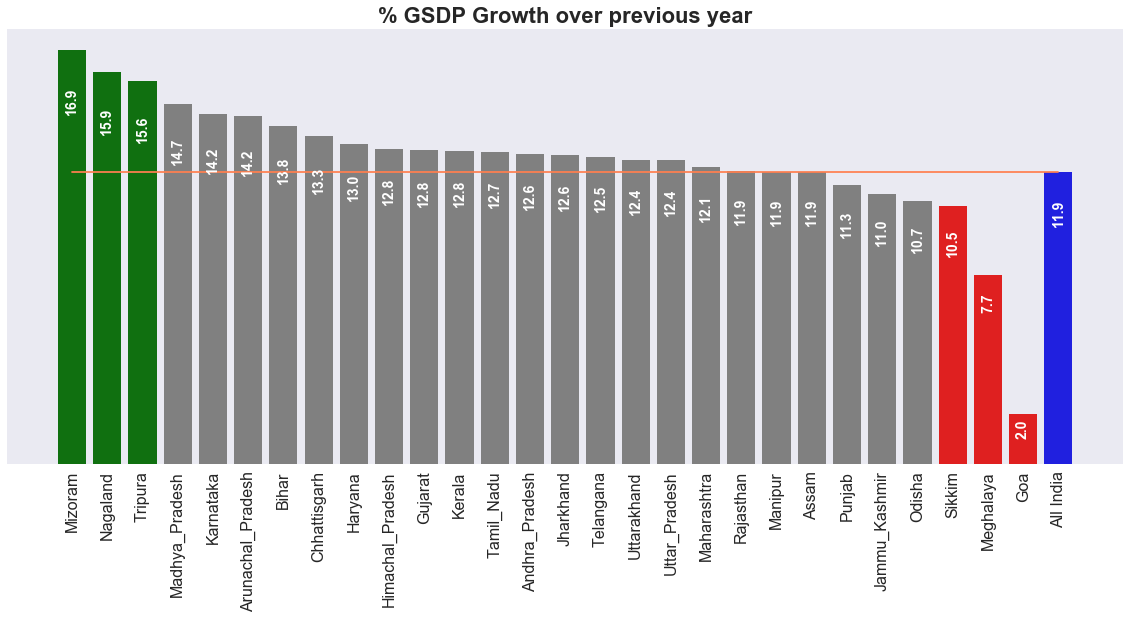

In [5]:
## prapare data frame
pd.set_option('display.max_colwidth', -1)
df_states=get_data_part_one_A()[get_data_part_one_A()['State']!='All India'][['State','Growth_avg']].sort_values(by='Growth_avg',ascending=False)
df_All_India=get_data_part_one_A()[get_data_part_one_A()['State']=='All India'][['State','Growth_avg']]

allIndiaavgs=df_All_India['Growth_avg']

df1=pd.concat([df_states,df_All_India])

plt.figure(figsize=(20,8))

def colr(i):
    if i <=2: return 'green'
    elif i==len(df1)-1: return 'blue'
    elif i in range(len(df1)-4,len(df1)-1): return 'red'
    else: return 'grey'
    return i

clrs=[colr(i) for i in range(0,len(df1))]

splot= sns.barplot(x='State',y='Growth_avg',data=df1,palette=clrs)

sns.lineplot(x=df1['State'], y=allIndiaavgs[0], color="coral")

for spine in plt.gca().spines.values():
    spine.set_visible(False)


bars=plt

plt.title('% GSDP Growth over previous year', alpha=1,fontsize=22,loc='center',fontweight='bold')

plt.xlabel("")
plt.ylabel("")
frame1=plt.gca()

# Rotate x axis labels
plt.xticks(rotation=90,fontsize=16)
    
frame1.axes.get_yaxis().set_ticks([])

# iterate and add bar value
for p in splot.patches:
    height=p.get_height()
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2 , 

                                                   (height/1.1)), ha = 'center', va = 'top', textcoords = 'data',color='w',fontsize=14, fontweight='bold',rotation=90)

plt.show()


# Part I-A
### Question :Plot the total GDP of the states for the year 2015-16

#### **1. Data Preparation**:
The ```get_data_part_one_A()``` DataFrame were used to extract ```GSDP``` 

#### **2. How**:
Extracted the data from and filtered only **GSDP-2015-16** for all the states. There were a number of 8 states that had missing data for the same period and was excluded from the analysis.

I have used barplot that is easy to compare states and easy to undersdand the differences.

#### **3. Analysis**:
This bar charts describes the Total GSDP in 28 states of India. 

The top 5 states with highest GSDP are **Tamil Nadu, Uttar Pradesh, Karnataka, Gujrat, Andra Pradesh** and the bottom 5 states are **Jamu and Kashmir, Goa, Maghalaya, Arunchal Pradesh and Sikim**. The average GSDP of top 5 states is **999,556**, the average GSDP of bottom 5 states is **45,111** and the national average is **385,957**. 

The average GSDP of top 5 sates is 22 times higher that the bottom 5 states and 2.6 times higher than national average.




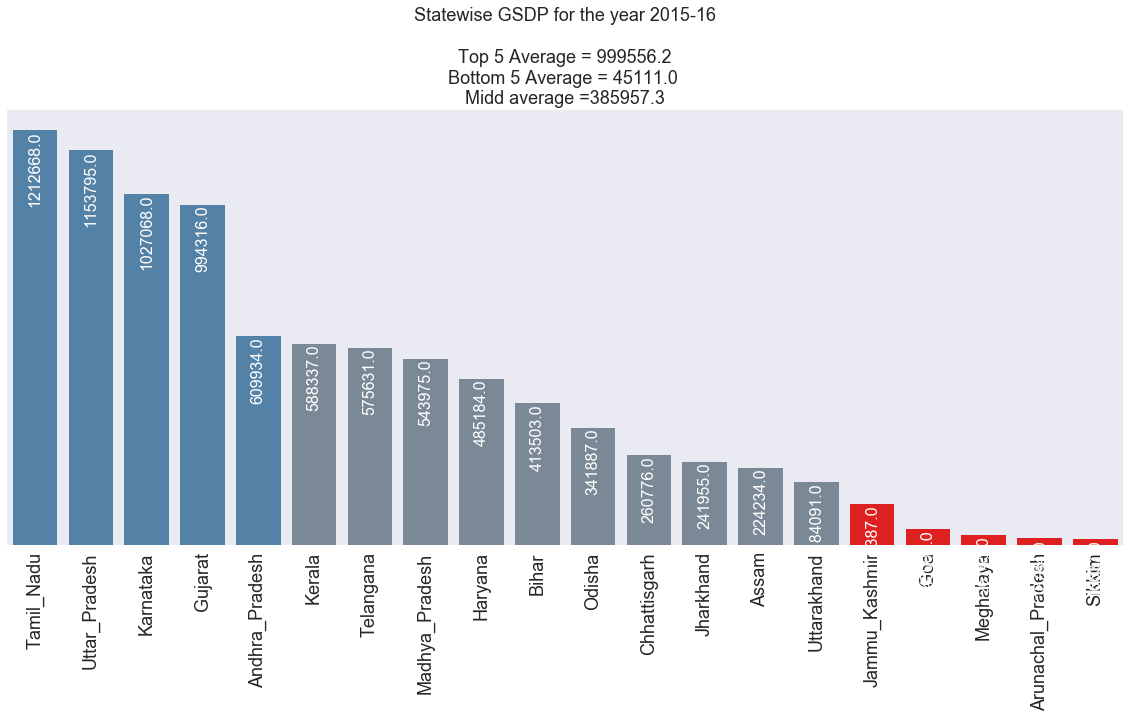

In [6]:
## prapare data frame
df1=get_data_part_one_A()[get_data_part_one_A()['State']!='All India'][['State','GSDP-2015-16']].sort_values(by='GSDP-2015-16',ascending=False)

# Filter missing data
df1=df1[df1['GSDP-2015-16'].notnull()]

#Get top 5 and bottom 5 average and mid average
top5_avg=df1.head(5).mean()[0]
bottom5_avg=df1.tail(5).mean()[0]
mid_avg=df1.iloc[5:-5].mean()[0]

plt.figure(figsize=(20,8))

def colr(i):
    if i <=4: return 'steelblue'
    elif i in range(len(df1)-5,len(df1)): return 'red'
    else: return 'lightslategray'
    return i

clrs=[colr(i) for i in range(0,len(df1))]

# clrs=['green' if x<=2 'red' if x in range(len(df1)-4,len(df1)-1) else 'grey' for x in range(len(df1['State']))]
splot= sns.barplot(x='State',y='GSDP-2015-16',data=df1,palette=clrs)

# sns.lineplot(x=df1['Growth_avg'], y=allIndiaavgs[0], color="coral")

for spine in plt.gca().spines.values():
    spine.set_visible(False)


bars=plt

plt.title('Statewise GSDP for the year 2015-16\n\n Top 5 Average = {0} \nBottom 5 Average = {1} \nMidd average ={2}'.format(top5_avg,bottom5_avg,mid_avg), alpha=1,fontsize=18,loc='center')

plt.xlabel("")
plt.ylabel("")
frame1=plt.gca()


plt.xticks(rotation=90,fontsize=18)
    
frame1.axes.get_yaxis().set_ticks([])

for p in splot.patches:
    height=p.get_height()
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2 , 

                                                   (height/1)), ha = 'center', va = 'top', textcoords = 'data',color='w',fontsize=16,rotation=90)

plt.show()


# Part I-B
### Question : Plot the GDP per capita for all the states

#### **1. Data Preparation**:
The ```combine_data_files()``` DataFrame were used to extract ```Per Capita GSDP (Rs.)``` 

#### **2. How**:
The data **Per Capita GSDP (Rs.)** were used to create a bar plot. The **bar** plot is then colored in three colors. The 5 lowest in ```red```, the top highest in ```steeblue``` and the rest were shown in ```grey``` color. 

Removed ```y``` axis label and did not use any grid because they did not add any meaning to the chart. But directly added the value of ```y``` on each bar. The ```state``` is shown in ```x``` axis.

Please also see the inline comment with the codes


#### **3. Analysis**:
This bar charts describes the GDP per capita in 28 states of India. The GDP per capita ranges from lowest **33954** INR in Bihar  to highest **271793** INR in Goa with national average of **113941** INR. The **ratio** of highest to lowest is 8. Means that Goa people earns 8 times more than Bihar people.

Overall, from 28 states, 12 states are above average and 16 states are below the national average.

The top 5 per capita states are **Goa, Sikim, Haryana, Kerala, and Uttarakhand** but the bottom 5 states are **Jharkhand, Assam, Manipur, Uttar Pradesh and Bihar.


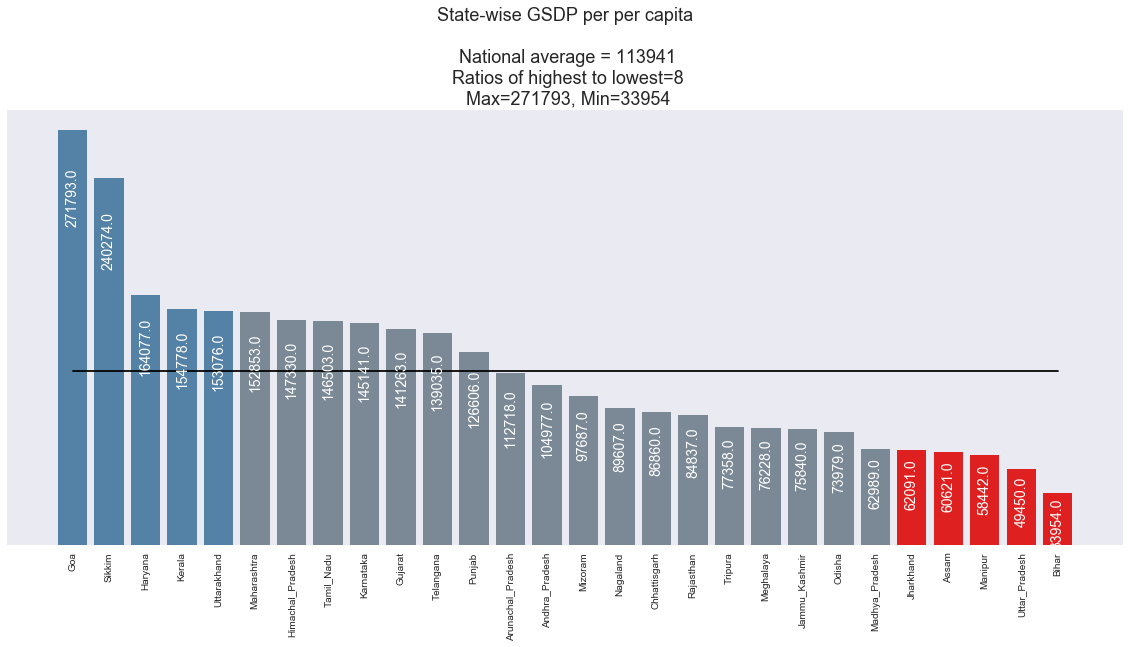

In [7]:
def gdp_per_capita():  
    ## prapare data frame
    df1=get_data_part_one_B()[['State','Per Capita GSDP (Rs.)']]
    # Filter missing data
    df1=df1[df1['Per Capita GSDP (Rs.)'].notnull()]

    # Sort Data from Larget to smallest
    df1=df1.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)


    #Get Maximu, minimu and calculate ration of highest to lowest
    gdpMax=max(df1['Per Capita GSDP (Rs.)'])
    gdpMin=min(df1['Per Capita GSDP (Rs.)'])
    RationofHighest =gdpMax/gdpMin

    # Average per capita 
    gdpAvg=df1['Per Capita GSDP (Rs.)'].mean()


    plt.figure(figsize=(20,8))

    def colr(i):
        if i <=4: return 'steelblue'
        elif i in range(len(df1)-5,len(df1)): return 'red'
        else: return 'lightslategray'
        return i

    clrs=[colr(i) for i in range(0,len(df1))]

    splot= sns.barplot(x='State',y='Per Capita GSDP (Rs.)',data=df1,palette=clrs)

    sns.lineplot(x=df1['State'], y=gdpAvg, color="black")

    for spine in plt.gca().spines.values():
        spine.set_visible(False)


    bars=plt

    plt.title('State-wise GSDP per per capita\n\n National average = {0}\n Ratios of highest to lowest={1}\n Max={2}, Min={3}'.format(int(gdpAvg),int(RationofHighest),int(gdpMax),int(gdpMin)), alpha=1,fontsize=18,loc='center')

    plt.xlabel("")
    plt.ylabel("")
    frame1=plt.gca()

    plt.xticks(rotation=90)

    frame1.axes.get_yaxis().set_ticks([])

    for p in splot.patches:
        height=p.get_height()
        splot.annotate(format(int(p.get_height()), '.1f'), (p.get_x() + p.get_width()/2 , 

                                                       (height/1.1)), ha = 'center', va = 'top', 
                       textcoords = 'data',color='w',fontsize=14,rotation=90)

    plt.show()
    
gdp_per_capita()


# Part I-B
### Question : Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

#### **1. Data Preparation**:
The ```combine_data_files()``` DataFrame were used to extract and calculate sector wise contribution to GDP  

#### **2. How**:
The data **Primary, Seconday, Tertiary** total were divided by **Gross State Domestic Product** to calculate percentag of contribution.

Then calculated the average of all states for each sector to find national average and then made a new data frame.
Please also see the inline comment with the codes

I have used **heatmap** to show contributoin of each sector to the total GDP. With this we can easily see sector's contrition to the overall. We could also use barplot but it is not showing very well becuase the colors are same for the same sector for states. With heatmap we can easily distinquish contrition of singel (high or low) at each sector level.

The darker the color the more contribution the sector has to the total GSDP

Total of **Primary, Secondary and Tertiary** sectors are not equal to GSDP because it does not includes taxes. Total GSDP is sum of sectors, plus taxes and deduction of subsidies.

#### **3. Analysis**:
This is a heatmap that shows contribution of three main sectors (primary, secondary, and tertiary) contribution to the overal state GDP. The more darker blue means the more contrition of that specic sector.

Overall, the **tertiary** sector has greater contribution, the second is **secondary** sector but **primary** sector has lowest contribution.

When going sector level,we can see some variation. In **Sikim, Gujrat and Uttarkhand** the secondary sector has the highest contrition while in Arunachal Pradesh, the primary sector has highest contribution.

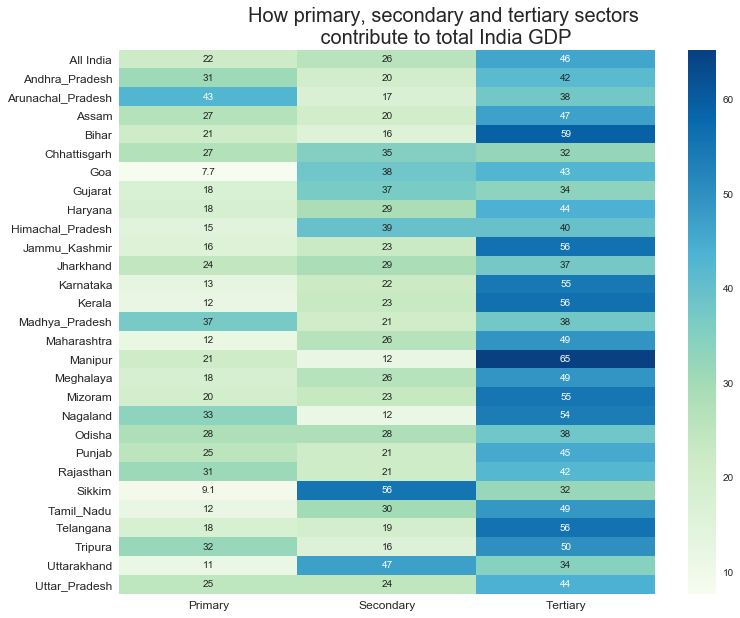

In [8]:
def sectors_contribution_to_gdp():
    # Extract and calculate state wise Primary, Seconday, and Tertiary 
    df1=combine_data_files()[['State','Primary','Secondary','Tertiary','Gross State Domestic Product','''Population ('00)''']]
    df1.rename(columns={'Gross State Domestic Product':'GDP','''Population ('00)''':'Population'},inplace=True)
    cols=['Primary','Secondary','Tertiary']
    df1['PPrimary']=(100*df1['Primary']/df1['GDP']).round(2)
    df1['PSecondary']=(100*df1['Secondary']/df1['GDP']).round(2)
    df1['PTertiary']=(100*df1['Tertiary']/df1['GDP']).round(2)
    df1=df1[['State','PPrimary','PSecondary','PTertiary']]

    # Calculate national average
    primary =round(df1['PPrimary'].mean())
    seconday=round(df1['PSecondary'].mean())
    tertiary=round(df1['PTertiary'].mean())

    dfn=pd.DataFrame({'State': [' All India'],
                     'PPrimary':[primary],
                     'PSecondary':[seconday],
                     'PTertiary':[tertiary]})

    dffinal=pd.concat([dfn,df1],sort=True)

    #Create Chart 
    fig, axes = plt.subplots(figsize=(12,10))
    plot = sns.heatmap(dffinal[['PPrimary','PSecondary','PTertiary']], annot=True,cmap ="GnBu")

    plot.set_xlabel(xlabel = '',fontsize=20)
    plot.set_ylabel(ylabel = '',fontsize=20)
    plot.set_yticklabels(labels = list(dffinal['State'].values), fontsize=12, rotation = 360)
    plot.set_xticklabels(labels = ['Primary', 'Secondary', 'Tertiary'], fontsize=12, rotation =360)
    fig.suptitle('How primary, secondary and tertiary sectors\n contribute to total India GDP', 
                 fontsize=20, x = 0.5, y = 0.94)
    plt.show()

sectors_contribution_to_gdp()

# Part I-B
### Question : Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower GDP) and %contribution of Primary sector to total GDP

#### **3. Analysis**:
When looking at the correlation of % primary and GSDP_Rank, we found that there is negative correlation between them.
It means when GSDP increases the other decreases.The correlation value is **-0.123981** which is negative correlation.

and when creating scatter plot and finding best fit line, it also shows a negative correlation between **% of primary sector contribution** against percentile rank of **GSDP** for each sector.


           PPrimary  GSDP_Rank
PPrimary   1.000000 -0.123981 
GSDP_Rank -0.123981  1.000000 


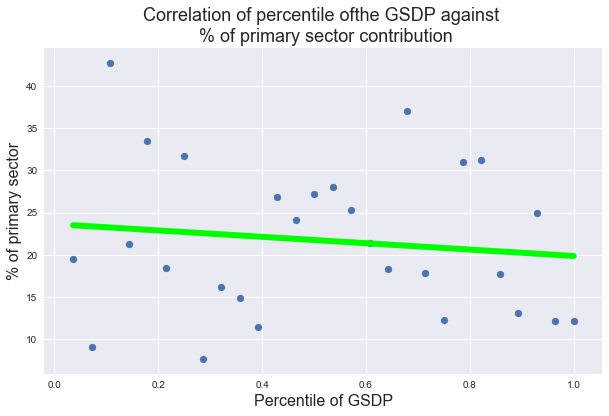

In [9]:
# Get Gross State Domestic Product column from the data frame and calculate percentage
df_percentile=combine_data_files()[['State','Primary','Secondary','Tertiary','Gross State Domestic Product']]

df_percentile.rename(columns={'Gross State Domestic Product':'GSDP'},inplace=True)
df_percentile['PPrimary']=(100*df_percentile['Primary']/df_percentile['GSDP']).round(2)

df_percentile=df_percentile[['State','PPrimary','GSDP']].sort_values(by='GSDP')
df_percentile['GSDP_Rank']=df_percentile.GSDP.rank(pct=True)

# calculating correlation of Primary percentage against GSDP_Rank percentile
# when looking at the correlation of % primary and GSDP_Rank, we found that there is negative correlation between them.
# It means when GSDP increases the other decreases
# The correlation value is -0.123981 which is less is negative.

print(df_percentile[['PPrimary','GSDP_Rank']].corr())

plt.figure(figsize=(10,6))
# let's draw a scatter plot and see the line of fit between Primary % and GSDP percentile to find how the correlatio looks like
m,c = np.polyfit(df_percentile['GSDP_Rank'],df_percentile['PPrimary'],1)
plt.scatter(x='GSDP_Rank',y='PPrimary',data=df_percentile)
plt.plot(df_percentile['GSDP_Rank'],m*df_percentile['GSDP_Rank']+c,'lime',linewidth=6)
plt.title("Correlation of percentile ofthe GSDP against \n % of primary sector contribution",fontsize=18)
plt.xlabel("Percentile of GSDP",fontsize=16)
plt.ylabel("% of primary sector",fontsize=16)

plt.show();

# Part I-B
### Question :  Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4
#### Question sub part 1

#### **1. Data Preparation**:
The ```get_data_part_one_B()()``` to perferm this calculation

#### **2. How**:
1. Categorized the **Per Capita GSDP (Rs.)** in 4 categories **C1, C2, C3, C4** using **qcut**
2. Then excluded un-needed columns and kept only sector 
3. Then groupbed by sector and summer for each sector
4. Transposed and saved as csv and then read back because of time limitation
5. Then calculated percentage of sector by total category. I have not used the total GSDP values instead calculated total of all sectors because with GSDP it showed much less than 70% for some sector
6. Then calculated the top 3/4/5 of a number between 2 ranges for exameple greater than or equal to 74 and less than or equal to 81. it is not fixed because the range was different. Refer to the table for better understanding

#### **3. Analysis**:
When categorizing to 4 quartiles **[0.20,0.5, 0.85, 1]** using the **Per Capita GSDP**, we found the following:
1. In category **C1** there are **6** sectors the contribute to **76%** of total GSDP. With these sectors like
```1. Manufacturing, 2. Agriculture, forestry and fishing, 3. Trade, repair, hotels and restaurants, 4.Real estate, ownership of dwelling & professional services, 5. Construction, and 6. Other services' ```
2. In category **C2** there are **7** sectors the contribute to **75%** of total GSDP the sectors are ```1. Manufacturing, 2. Real estate, ownership of dwelling & professional services, 3. Agriculture, forestry and fishing, 4. Trade, repair, hotels and restaurants, 5. Construction, 6. Transport, storage, communication & services related to broadcasting, and 7. Financial services```
3. In category **C3** there are **7** sectors the contribute to **77%** of total GSDP.The sectors are ```1. Agriculture, forestry and fishing, 2. Manufacturing, 3. Trade, repair, hotels and restaurants, 4. Real estate, ownership of dwelling & professional services,, 5. Construction, 6. Mining and quarrying, and 7. Other services```
4. In category **C4** there are **7** sectors the contribute to **81%** of total GSDP.The sectors are ```1. Agriculture, forestry and fishing, 2. Trade, repair, hotels and restaurants, 3. Manufacturing, 4. Construction, 5. Real estate, ownership of dwelling & professional services, 6. Transport, storage, communication & services related to broadcasting, and 7. Other services```


5. When comparing the total GDP distribution of C1 states with other category states, we found the category C1 states total GDP is less than C2 states, while C3 states are less than C4 states. The categorization was made based on the GDP per capita of each state. Category 1 was with high 

  Category  TopCutOff  \
0  C1       0.76        
1  C2       0.75        
2  C3       0.77        
3  C4       0.81        

                                                                                                                                                                                                                                             Sectors  \
0  [ManufacturingAgriculture, forestry and fishingTrade, repair, hotels and restaurantsReal estate, ownership of dwelling & professional servicesConstructionOther services]                                                                           
1  [ManufacturingReal estate, ownership of dwelling & professional servicesAgriculture, forestry and fishingTrade, repair, hotels and restaurantsConstructionTransport, storage, communication & services related to broadcastingFinancial services]   
2  [Agriculture, forestry and fishingManufacturingTrade, repair, hotels and restaurantsReal estate, ownership of dwelling & profes

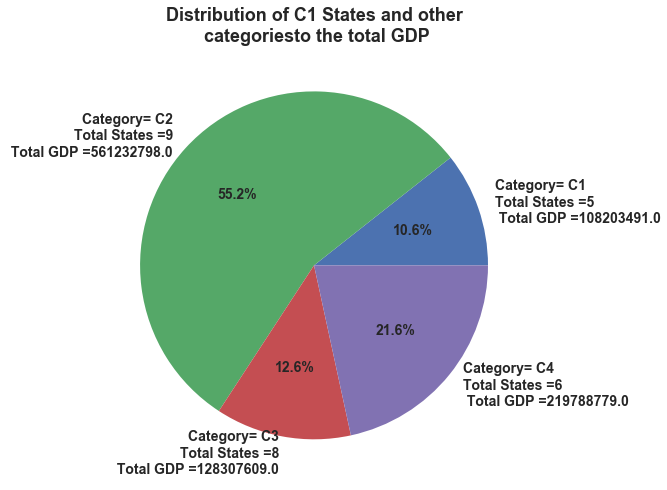

In [10]:
## get data
df1=get_data_part_one_B()

# Calculate it in 4 categorie
# I have used the qcut for this to calculate

df1['Tag']=pd.qcut(df1['Per Capita GSDP (Rs.)'],q=[0,0.20,0.5, 0.85, 1],labels=['C4','C3','C2','C1'])

# Exclude sectors population and per capita
df1=df1[['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Trade, repair, hotels and restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tag','Gross State Domestic Product']]

# To count states
df1['Counter']=1

# Group by Tag and Transpose
df1=df1.groupby(['Tag']).sum().T

# save and then read back for time safety
df1.to_csv('Tags.csv')
df2=pd.read_csv('Tags.csv')

# Separate sector in a data frame
df_sector=df2.iloc[:-2,:].copy()

# Separate GSDP in a data frame
df_gsdp=df2.iloc[-2].copy()
df_count_ofstates=df2.iloc[-1].copy()

df_sector['C1Pct']=(df_sector['C1']/df_gsdp['C1']).round(2)
df_sector['C2Pct']=(df_sector['C2']/df_gsdp['C2']).round(2)
df_sector['C3Pct']=(df_sector['C3']/df_gsdp['C3']).round(2)
df_sector['C4Pct']=(df_sector['C4']/df_gsdp['C4']).round(2)

# Counter for getting total sectors
df_sector['Counter']=1

def top_contributing_sector():
    #Calculate c1. I have not used loop but simple
    df2=df_sector
    c1df=df2[['Item','C1Pct','Counter']].sort_values(by='C1Pct',ascending=False)
    c1df=c1df.cumsum()

    c1_eighty=[]
    c1pct=0
    c1counter=0
    for i in range(c1df.shape[0]):
        if (c1df['C1Pct'][i]>=0.74) and (c1df['C1Pct'][i]<=0.80):
            c1pct=c1df['C1Pct'][i]
            c1_eighty.append(c1df['Item'][i])
            c1counter=c1df['Counter'][i]
            break

    # c2
    c2df=df2[['Item','C2Pct','Counter']].sort_values(by='C2Pct',ascending=False)
    c2df=c2df.cumsum()
    
    c2_eighty=[]
    c2counter=0
    c2pct=0
    for i in range(c2df.shape[0]):
        if 0.75<=c2df['C2Pct'][i]<=0.82:
            c2pct=c2df['C2Pct'][i]
            c2_eighty.append(c2df['Item'][i])
            c2counter=c2df['Counter'][i]
            break

    # C#
    c3df=df2[['Item','C3Pct','Counter']].sort_values(by='C3Pct',ascending=False)
    c3df=c3df.cumsum()
    
    c3_eighty=[]
    c3counter=0
    c3pct=0
    for i in range(c3df.shape[0]):
        if 0.75<=c3df['C3Pct'][i]<=0.82:
            c3pct=c3df['C3Pct'][i]
            c3_eighty.append(c3df['Item'][i])
            c3counter=c3df['Counter'][i]
            break

    # C4
    c4df=df2[['Item','C4Pct','Counter']].sort_values(by='C4Pct',ascending=False)
    c4df=c4df.cumsum()
    
    c4_eighty=[]
    c4counter=0
    c4pct=0
    for i in range(c4df.shape[0]):
        if 0.75<=c4df['C4Pct'][i]<=0.82:
            c4pct=c4df['C4Pct'][i]
            c4_eighty.append(c4df['Item'][i])
            c4counter=c4df['Counter'][i]
            break
          
    lst=list(df2.Item.values)

    final_df=pd.DataFrame({'Category':['C1','C2','C3','C4'],
                         'TopCutOff':[c1pct,c2pct,c3pct,c4pct],
                         'Sectors':[c1_eighty,c2_eighty,c3_eighty,c4_eighty],
                          "TotalSectors":[c1counter,c2counter,c3counter,c4counter]})
    return final_df

  
    
print(top_contributing_sector())

# Prepare df
df_cat=df_sector[['C1','C2','C3','C4']].sum()
df_cat2=pd.DataFrame({'Cat':['C1','C2','C3','C4'],
                     'Values':df_cat,
                     'TotalStates':df_count_ofstates[['C1','C2','C3','C4']]})


plt.figure(figsize=(8,8))

stateLabels=[]
for i in df_cat2['Cat']:
    stateLabels.append('Category= '+i+'\nTotal States ={0}\n Total GDP ={1}'.format(str(int(df_cat2['TotalStates'][i])),df_cat2['Values'][i]))
               
splot= plt.pie(x='Values',labels=stateLabels,data=df_cat2,autopct='%1.1f%%',textprops={'fontsize': 14,'fontweight':'bold'})


bars=plt
plt.title('Distribution of C1 States and other\n categoriesto the total GDP', alpha=1,fontsize=18,loc='center',fontweight='bold')


plt.show()


# Part I-B
### Question :  Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4
#### Question sub part 2- Plot the contribution of the sub-sectors as a percentage of the GSDP of each category

#### **1. Data Preparation**:
Using the generated data file **Tags.csv** data and will calculate the ratio but this time from '

#### **2. How**:
1. The data is extracted from the Tags.csv calculated above
2. Then the percentage is calculated for total GSDP for each category
3. Then bar charts are created for each category. Totally 4 charts.

#### **3. Analysis**:
1. In category 1 and 

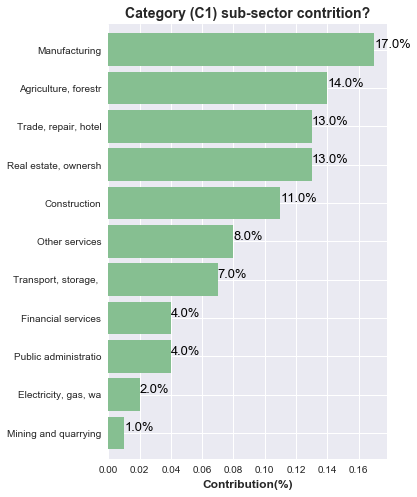

In [11]:
# Read the generated data which was used above and then calculate ration
dffile=pd.read_csv('Tags.csv')

# Separate sector in a data frame
df2=dffile.iloc[:-2,:].copy()

# Separate GSDP in a data frame
df_gsdp=dffile.iloc[-2].copy()

df2['C1Pct']=(df2['C1']/df_gsdp[4]).round(2)
df2['C2Pct']=(df2['C2']/df_gsdp[3]).round(2)
df2['C3Pct']=(df2['C3']/df_gsdp[2]).round(2)
df2['C4Pct']=(df2['C4']/df_gsdp[1]).round(2)

# #Now filter the columns
dfc1=df2[['Item','C1Pct','C2Pct','C3Pct','C4Pct']].copy()
dfc1['Item2']=dfc1['Item'].str[:20]
dfc1=dfc1.sort_values(by='C1Pct',ascending=False)


fig, ax1 =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(5,8));
y_pos=range(len(dfc1))
dfc1['C1Pct'].plot.barh(y=dfc1['Item2'], ax=ax1,color='#86bf91',width=0.85)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfc1['Item2'])
ax1.invert_yaxis()
ax1.set_title('Category (C1) sub-sector contrition?', weight='bold',fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlabel("Contribution(%)", labelpad=5, weight='bold', size=12)

    
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.38, \
            str(round((i.get_width())*100, 0))+'%', fontsize=13,color='black')


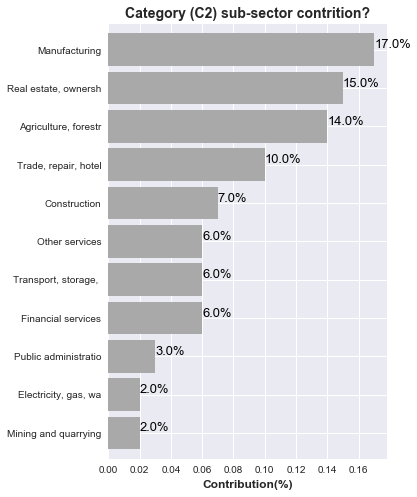

In [12]:
fig, ax1 =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(5,8));
y_pos=range(len(dfc1))
dfc1=dfc1.sort_values(by='C2Pct',ascending=False)
dfc1['C2Pct'].plot.barh(y=dfc1['Item2'], ax=ax1,color='darkgrey',width=0.85)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfc1['Item2'])
ax1.invert_yaxis()
ax1.set_title('Category (C2) sub-sector contrition?',weight='bold',fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlabel("Contribution(%)", labelpad=5, weight='bold', size=12)

for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.38, \
            str(round((i.get_width())*100, 2))+'%', fontsize=13,color='black')

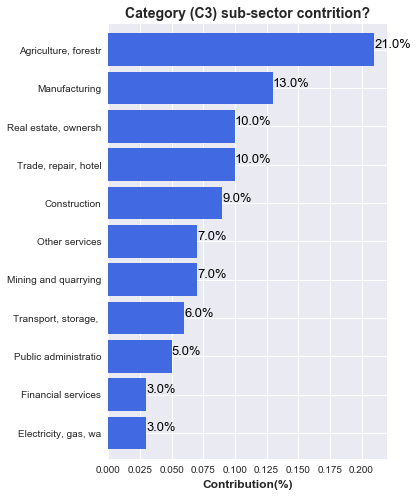

In [13]:
fig, ax1 =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(5,8));
y_pos=range(len(dfc1))
dfc1=dfc1.sort_values(by='C3Pct',ascending=False)
dfc1['C3Pct'].plot.barh(y=dfc1['Item2'], ax=ax1,color='royalblue',width=0.85)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfc1['Item2'])
ax1.invert_yaxis()
ax1.set_title('Category (C3) sub-sector contrition?',weight='bold',fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlabel("Contribution(%)", labelpad=5, weight='bold', size=12)

for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.38, \
            str(round((i.get_width())*100, 2))+'%', fontsize=13,color='black')

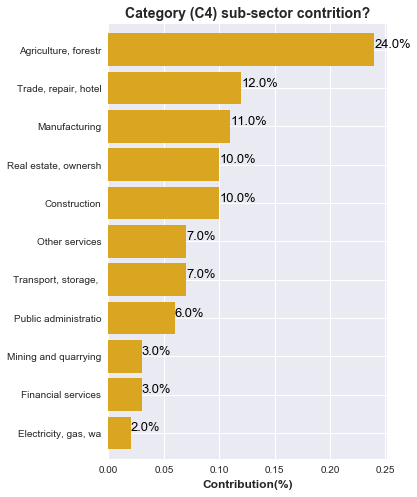

In [15]:
fig, ax1 =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(5,8));
y_pos=range(len(dfc1))
dfc1=dfc1.sort_values(by='C4Pct',ascending=False)
dfc1['C4Pct'].plot.barh(y=dfc1['Item2'], ax=ax1,color='goldenrod',width=0.85)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfc1['Item2'])
ax1.invert_yaxis()
ax1.set_title('Category (C4) sub-sector contrition?',weight='bold',fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlabel("Contribution(%)", labelpad=5, weight='bold', size=12)

for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.38, \
            str(round((i.get_width())*100, 2))+'%', fontsize=13,color='black')


# Part-II: GDP and Education
### Question :  Analyse if there is any correlation of GDP per capita with dropout rates in education

#### **1. Data Preparation**:
Using the ```combine_data_files()``` data frame  has been used to calculate the data for this chart. I have used heatmap to find correlation of  (primary, upper primary and secondary) for the year 2014-2015 for each state.

#### **2. How**:
1. Extract the columns ```'PerCapitaGSDP','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts',             'Per Capita GSDP (Rs.)'``` 
2. Then renamed some columns for easy reference
3. Then extracte the columsn for drop outs of **Primary**, **Secondary**, and **Tertiary** against **GDP Per Capita**
4. Then created the correlation between columns ```['PerCapitaGSDP','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']```
5. Then created the heatmap

#### **3. Analysis**:
1. The heavy red color boxes show the negative correlation of drop out rate against GSDP per capita. 
The heatmap show a negative correlation of GSDP per capita gainst drop out rate. It mean when drop out is raising the GSDP per capita is decreasing. This negative correlation exist for all Primary, Upper Primary and Secondary. 
To decrease drop out, it is highly recommended that the GSDP per capita is increased.

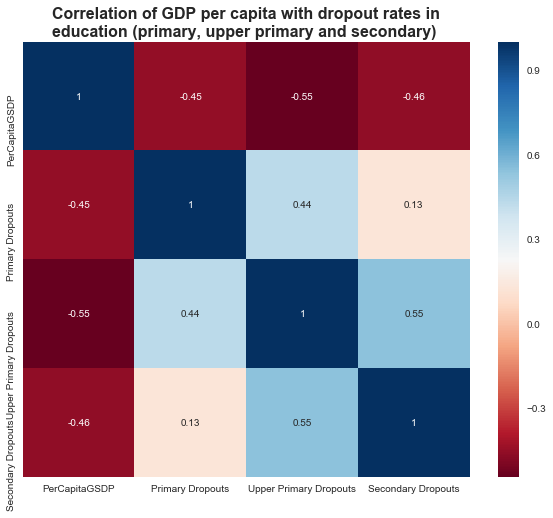

In [14]:
df1=combine_data_files()[['State','Primary','Secondary','Tertiary','Gross State Domestic Product','''Population ('00)''',
                          '''Per Capita GSDP (Rs.)''','Drop_Primary','Drop_Upper_Primary','Drop_Secondary','DropAvg']]
df1.rename(columns={'Gross State Domestic Product':'GDP','''Population ('00)''':'Population',
                    '''Per Capita GSDP (Rs.)''':'PerCapitaGSDP','Drop_Primary':'Primary Dropouts','Drop_Upper_Primary':'Upper Primary Dropouts','Drop_Secondary':'Secondary Dropouts'},inplace=True)

# Extract only relevant column
df1=df1[['PerCapitaGSDP','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']]

# Correlation between drop out rate and GSDP per capita
cor = df1.corr()
round(cor, 3)

# Plotting and setting figure size
plt.figure(figsize=(10,8))

# Plotting heatmap
sns.heatmap(cor, cmap="RdBu", annot=True)
plt.title('Correlation of GDP per capita with dropout rates in\neducation (primary, upper primary and secondary) ', alpha=1,fontsize=16,loc='center',fontweight='bold')

plt.show()


The light color red boxes show the negative correlation of drop out rate against GSDP per capita. 
The heatmap show a negative correlation of GSDP per capita gainst drop out rate. It mean when drop out is raising the GSDP per capita is decreasing. This negative correlation exist for all Primary, Upper Primary and Secondary. 
To decrease drop out, it is highly recommended that the GSDP per capita is increased.



# Part-II: GDP and Education
### Question : Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

#### **1. Data Preparation**:
Using the ```combine_data_files()``` data frame  has been used to calculate the data for this chart. I have used heatmap to plot this.


#### **2. How**:
1. Extract the columns ```State','Primary','Secondary','Tertiary','Gross State Domestic Product','''Population ('00)''',             'Per Capita GSDP (Rs.)','Drop_Primary','Drop_Upper_Primary','Drop_Secondary','DropAvg']``` 
2. Then renamed some columns for easy reference
3. Then extracte the columsn for drop outs of **Primary**, **Secondary**, and **Tertiary** against Gross State Domestic Product**
4. Then calculated the % contribution for each sector
5. Then extracted and create correlation between columns ```['Primary Sector Contrib','Secondary Sector Contrib','Tertiary Sector Contrib','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']```
5. Then created the heatmap

#### **3. Analysis**:
1. There is correlation between drop rates and % of primary sector contribution, but negative correlation among drop out rates and secondary sector. Positive correlation between primary drop out rate and % Tertiary contrition to GDP, no correlation or a bit correlation between Secondary drop out rate and Tertiary sector but negative correlation betwen Upper Primary drop out rate and secondary sector.
2. A correlation of or close to 1 is perfect corration, 0 nor correlation but -1 negative correlation

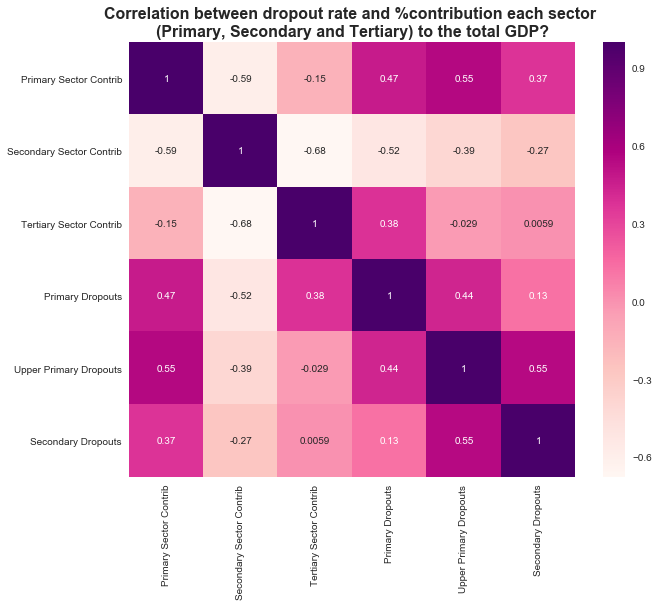

In [15]:
df1=combine_data_files()[['State','Primary','Secondary','Tertiary','Gross State Domestic Product','''Population ('00)''',
                          '''Per Capita GSDP (Rs.)''','Drop_Primary','Drop_Upper_Primary','Drop_Secondary','DropAvg']]
df1.rename(columns={'Gross State Domestic Product':'GDP','''Population ('00)''':'Population',
                    '''Per Capita GSDP (Rs.)''':'PerCapitaGSDP','Drop_Primary':'Primary Dropouts','Drop_Upper_Primary':'Upper Primary Dropouts','Drop_Secondary':'Secondary Dropouts'},inplace=True)
cols=['Primary Sector Contrib','Secondary Sector Contrib','Tertiary Sector Contrib']
df1['Primary Sector Contrib']=(100*df1['Primary']/df1['GDP']).round(2)
df1['Secondary Sector Contrib']=(100*df1['Secondary']/df1['GDP']).round(2)
df1['Tertiary Sector Contrib']=(100*df1['Tertiary']/df1['GDP']).round(2)

# Extract only relevant column
df2=df1[['Primary Sector Contrib','Secondary Sector Contrib','Tertiary Sector Contrib',
         'Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']]

# Correlation between drop out rate and contributtion of sectors to total GSDP.

# using df.corr()
cor = df2.corr()
round(cor, 3)

# Plotting and setting figure size
plt.figure(figsize=(10,8))

# Plotting heatmap
sns.heatmap(cor, cmap="RdPu", annot=True)
plt.title('Correlation between dropout rate and %contribution each sector \n(Primary, Secondary and Tertiary) to the total GDP?', alpha=1,fontsize=16,loc='center',fontweight='bold')


plt.show()

1. There is good correlation between drop rates and % of primary sector contribution, but negative correlation among drop out rates and secondary sector. Positive correlation between primary drop out rate and % Tertiary contrition to GDP, no correlation or a bit correlation between Secondary drop out rate and Tertiary sector but negative correlation betwen Upper Primary drop out rate and secondary sector.
2. A correlation of or close to 1 is perfect corration, 0 nor correlation but -1 negative correlation


# Part-II: GDP and Education
### Question : You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

#### **1. Data Preparation**:
Using the ```combine_data_files()``` data frame  has been used to calculate the data for this chart. I have used heatmap to plot this.


#### **2. How**:
1. Extract the columns ```'''Population ('00)''',             'Per Capita GSDP (Rs.)','Drop_Primary','Drop_Upper_Primary','Drop_Secondary','DropAvg']``` 
2. Then renamed some columns for easy reference
3. Then extracted and create correlation between columns ```['Population','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']```
4. Then created the heatmap

#### **3. Analysis**:
1. There is negative correlation between drop  out rates and popuplation. It means that when population increases the drop out decreases and when drop out increase the population decrease.

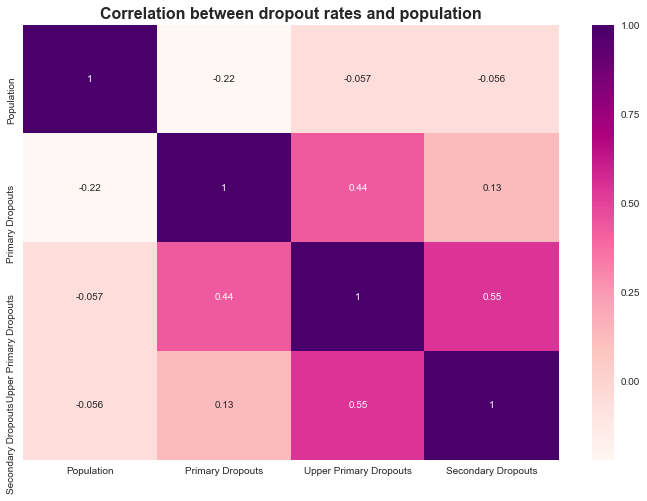

In [16]:
# calculate the data frame 
df1=combine_data_files()[['State','Primary','Secondary','Tertiary','Gross State Domestic Product','''Population ('00)''',
                          '''Per Capita GSDP (Rs.)''','Drop_Primary','Drop_Upper_Primary','Drop_Secondary','DropAvg']]
df1.rename(columns={'Gross State Domestic Product':'GDP','''Population ('00)''':'Population',
                    '''Per Capita GSDP (Rs.)''':'PerCapitaGSDP','Drop_Primary':'Primary Dropouts','Drop_Upper_Primary':'Upper Primary Dropouts','Drop_Secondary':'Secondary Dropouts'},inplace=True)


# Extract only relevant column
df2=df1[['Population','Primary Dropouts','Upper Primary Dropouts','Secondary Dropouts']]

# Correlation between drop out rate and contributtion of sectors to total GSDP.

# using df.corr()
cor = df2.corr()
round(cor, 3)

# Plotting and setting figure size
plt.figure(figsize=(12,8))

# Plotting heatmap
sns.heatmap(cor, cmap="RdPu", annot=True)
plt.title('Correlation between dropout rates and population', alpha=1,fontsize=16,loc='center',fontweight='bold')

plt.show()

# Then End